------------------------


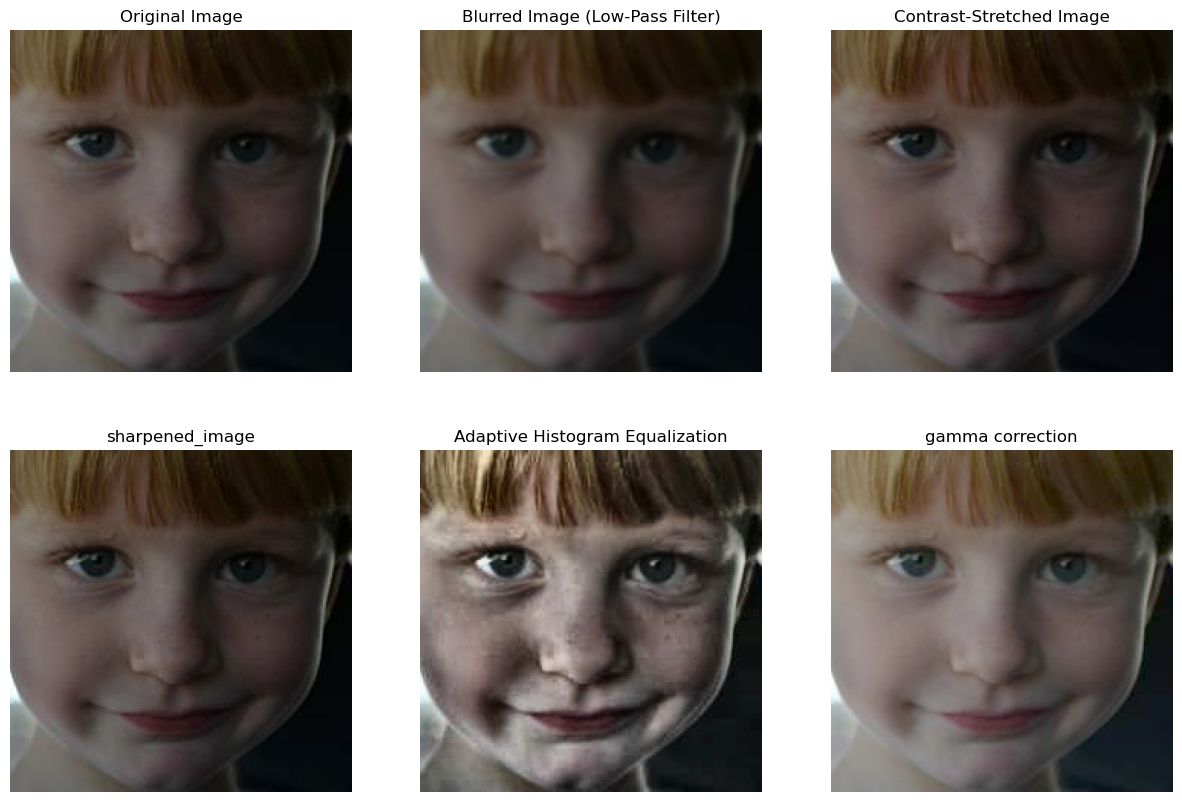

In [64]:
# apply contrast stretching
# New intensity = (((Old intensity−Old Min)×(New Max−New Min))/(Old Max−Old Min))+New Min
# This adjusts the intensity values of each pixel in the image.
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Function to apply contrast stretching to an individual channel
def contrast_stretching(image_channel):
    min_val = np.min(image_channel)
    max_val = np.max(image_channel)
    # Avoid division by zero 
    if max_val - min_val == 0:
        return image_channel
    stretched_image = (image_channel - min_val) * (255 / (max_val - min_val))
    return np.uint8(stretched_image)

# Read the image
image = cv2.imread('45056.jpg')

# Split the image into its color channels
b_channel, g_channel, r_channel = cv2.split(image)

# Apply contrast stretching to each channel
stretched_b = contrast_stretching(b_channel)
stretched_g = contrast_stretching(g_channel)
stretched_r = contrast_stretching(r_channel)

# Merge the stretched channels back into a color image
stretched_img = cv2.merge((stretched_b, stretched_g, stretched_r))

# Convert to RGB for displaying with matplotlib
stretched_img_rgb = cv2.cvtColor(stretched_img, cv2.COLOR_BGR2RGB)
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# -----------------------------------------------------------------------------

# Apply a Gaussian low-pass filter (Gaussian blur)
# The second argument is the kernel size, and the third is the standard deviation
blurred_img = cv2.GaussianBlur(image, (5, 5), 0)

# Convert images to RGB format 
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
blurred_img_rgb = cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB)

# --------------------------------------------------------------------------------

# Apply Gaussian blur to the image
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Sharpen the image by subtracting the blurred image from the original
sharpened_image = cv2.addWeighted(image, 1.5, blurred_image, -0.5, 0)

# --------------------------------------------------------------------------

# Convert the image to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Split LAB image channels
l, a, b = cv2.split(lab_image)

# Apply CLAHE to the L channel
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
l_clahe = clahe.apply(l)

# Merge the CLAHE enhanced L channel with A and B channels
lab_image_clahe = cv2.merge((l_clahe, a, b))

# Convert back to BGR color space
enhanced_imag = cv2.cvtColor(lab_image_clahe, cv2.COLOR_LAB2BGR)

# --------------------------------------------------------------------

def adjust_gamma(image, gamma = 1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Apply gamma correction with gamma = 1.5 
enhanced_image = adjust_gamma(image, gamma=1.5)

# -----------------------------------------------------------------------
# Display the images side by side
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 3, 1)  # 1 row, 2 columns
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# Blurred image
plt.subplot(2, 3, 2)
plt.imshow(blurred_img_rgb)
plt.title('Blurred Image (Low-Pass Filter)')
plt.axis('off')

# Contrast-stretched image
plt.subplot(2, 3, 3)
plt.imshow(stretched_img_rgb)
plt.title('Contrast-Stretched Image')
plt.axis('off')
#plt.show()
print("------------------------")
# sharpened_image
plt.subplot(2, 3, 4)
plt.title('sharpened_image')
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Adaptive Histogram Equalization
plt.subplot(2, 3, 5)
plt.title('Adaptive Histogram Equalization')
plt.imshow(cv2.cvtColor(enhanced_imag, cv2.COLOR_BGR2RGB))
plt.axis('off')

# gamma correction
plt.subplot(2, 3, 6)
plt.title('gamma correction')
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

#plt.show()



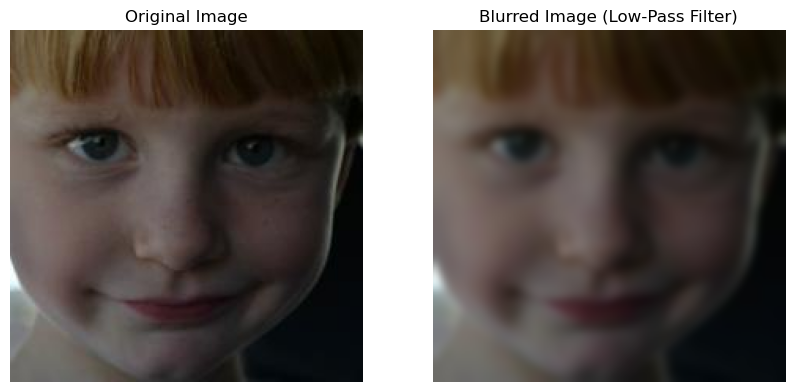

True

In [12]:
import cv2
from matplotlib import pyplot as plt

# Apply a Gaussian low-pass filter (Gaussian blur)
# The second argument is the kernel size, and the third is the standard deviation
blurred_img = cv2.GaussianBlur(img, (15, 15), 0)

# Convert images to RGB format for displaying with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blurred_img_rgb = cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB)

# Display the original and blurred images side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# Blurred image
plt.subplot(1, 2, 2)
plt.imshow(blurred_img_rgb)
plt.title('Blurred Image (Low-Pass Filter)')
plt.axis('off')

plt.show()

# Optionally save the blurred image
cv2.imwrite('blurred_color_image.jpg', blurred_img)

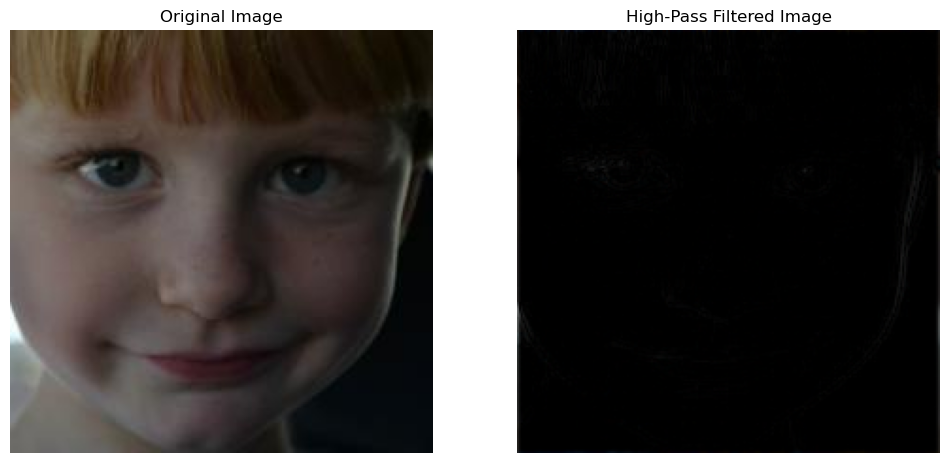

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gaussian_high_pass_filter(image, cutoff):
    # Get the dimensions of the image
    rows, cols, channels = image.shape
    crow, ccol = rows // 2, cols // 2

    # Create a Gaussian filter
    x = np.linspace(-ccol, ccol - 1, cols)
    y = np.linspace(-crow, crow - 1, rows)
    X, Y = np.meshgrid(x, y)
    gaussian = np.exp(-(X**2 + Y**2) / (2 * cutoff**2))

    # Create the high-pass filter
    high_pass_filter = 1 - gaussian

    # Perform FFT on each channel
    filtered_image = np.zeros_like(image, dtype=np.float32)
    for i in range(channels):
        f_transform = np.fft.fft2(image[:, :, i])
        f_transform_shifted = np.fft.fftshift(f_transform)

        # Apply the high-pass filter
        filtered_transform = f_transform_shifted * high_pass_filter

        # Inverse FFT
        f_ishift = np.fft.ifftshift(filtered_transform)
        img_back = np.fft.ifft2(f_ishift)
        filtered_image[:, :, i] = np.abs(img_back)

    return np.clip(filtered_image, 0, 255).astype(np.uint8)

# Load a color image
image = cv2.imread('45056.jpg')  # Load in color
cutoff = 30  # Adjust cutoff frequency as needed

# Apply the high-pass filter
result = gaussian_high_pass_filter(image, cutoff)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('High-Pass Filtered Image')
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

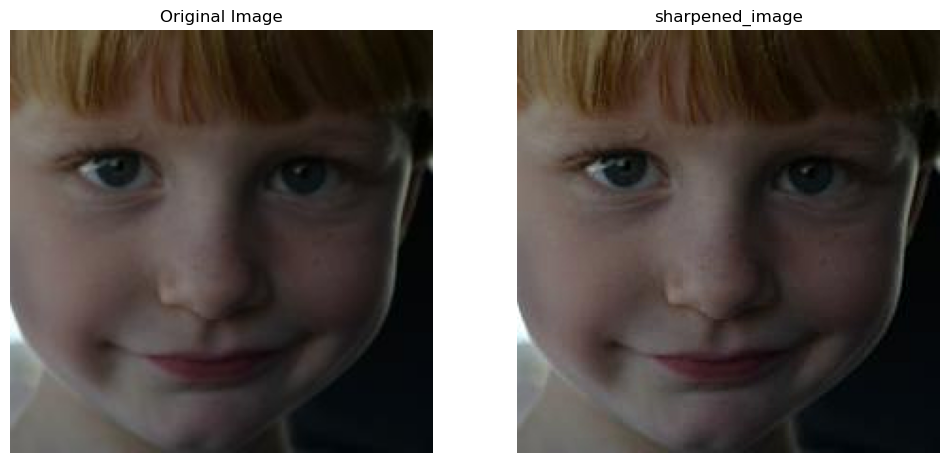

In [2]:
# Gaussian Blur + Sharpening Filter
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Apply Gaussian blur to the image
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Sharpen the image by subtracting the blurred image from the original
sharpened_image = cv2.addWeighted(image, 1.5, blurred_image, -0.5, 0)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('sharpened_image')
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

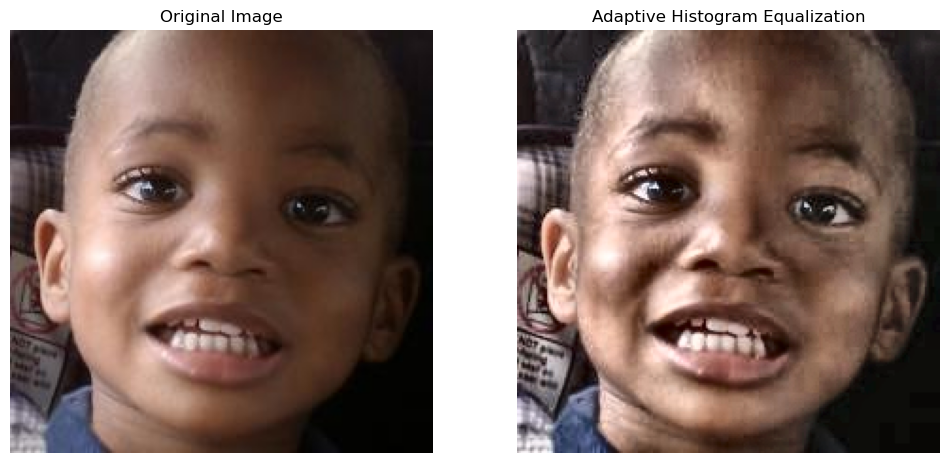

In [25]:
# Contrast Limited Adaptive Histogram Equalization
import cv2

image = cv2.imread('3147.jpg')
# Convert the image to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Split LAB image channels
l, a, b = cv2.split(lab_image)

# Apply CLAHE to the L channel
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
l_clahe = clahe.apply(l)

# Merge the CLAHE enhanced L channel with A and B channels
lab_image_clahe = cv2.merge((l_clahe, a, b))

# Convert back to BGR color space
enhanced_image = cv2.cvtColor(lab_image_clahe, cv2.COLOR_LAB2BGR)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Adaptive Histogram Equalization')
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

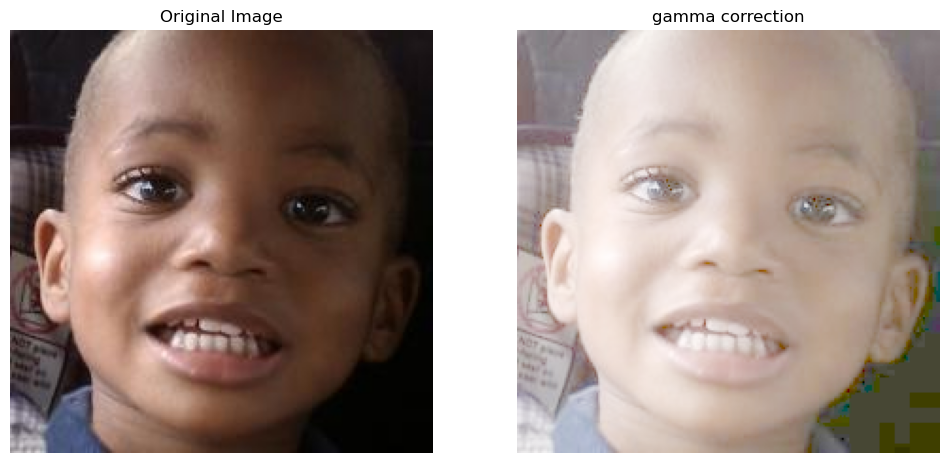

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
def adjust_gamma(image, gamma = 1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Apply gamma correction with gamma = 1.5 (to brighten the image)
image = cv2.imread('3147.jpg')
enhanced_image = adjust_gamma(image, gamma=1.5)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('gamma correction')
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

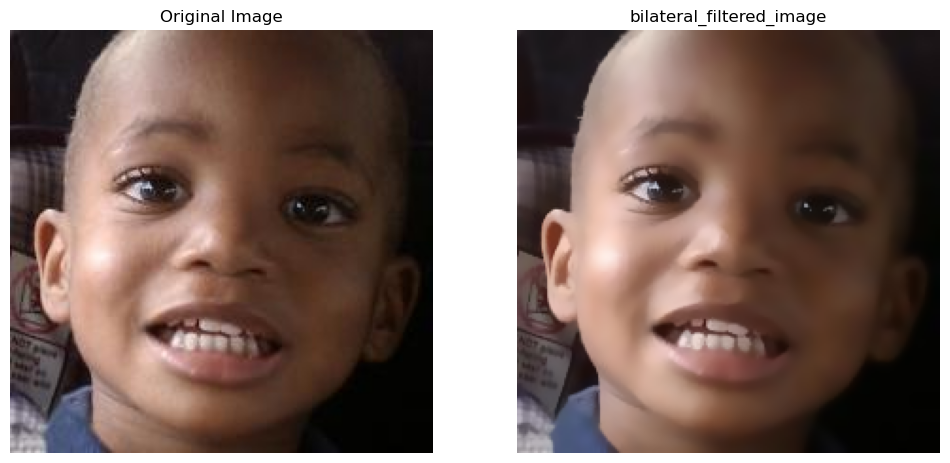

In [12]:
# Apply bilateral filter
bilateral_filtered_image = cv2.bilateralFilter(image, d=9, sigmaColor=45, sigmaSpace=45)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('bilateral_filtered_image')
plt.imshow(cv2.cvtColor(bilateral_filtered_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

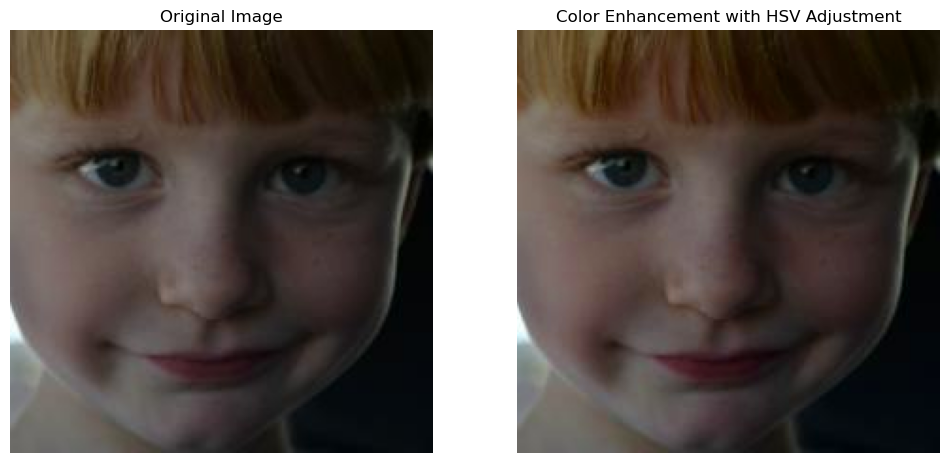

In [5]:
# Color Enhancement with HSV Adjustment
# Convert to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split HSV channels
h, s, v = cv2.split(hsv_image)

# Enhance saturation by scaling
s = cv2.multiply(s, 1.2)  # Increase saturation by 20%

# Merge the channels and convert back to BGR
hsv_enhanced = cv2.merge((h, s, v))
enhanced_image = cv2.cvtColor(hsv_enhanced, cv2.COLOR_HSV2BGR)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Color Enhancement with HSV Adjustment')
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

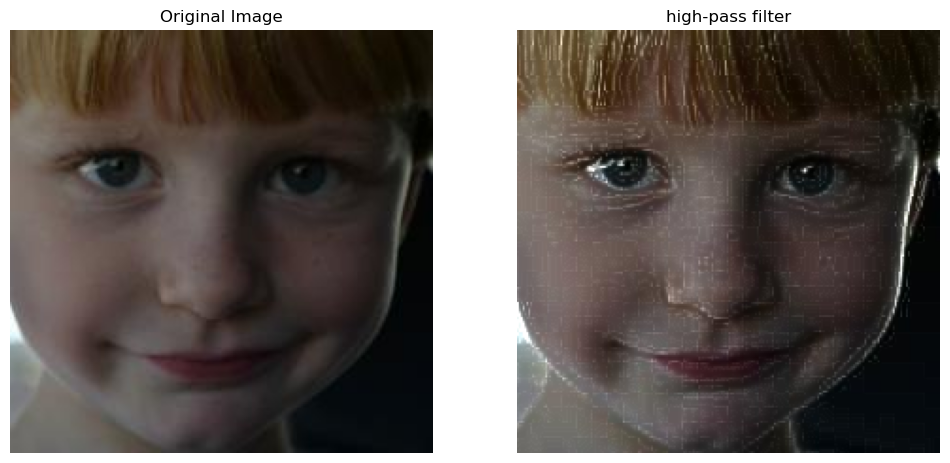

In [6]:
import cv2
import numpy as np

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a high-pass filter kernel
kernel = np.array([[-1, -1, -1], 
                   [-1, 8, -1], 
                   [-1, -1, -1]])

# Apply the high-pass filter
high_pass_image = cv2.filter2D(gray_image, -1, kernel)

# Add the filtered image back to the original for sharpening
sharpened_image = cv2.add(image, np.stack([high_pass_image]*3, axis=-1))

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('high-pass filter')
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

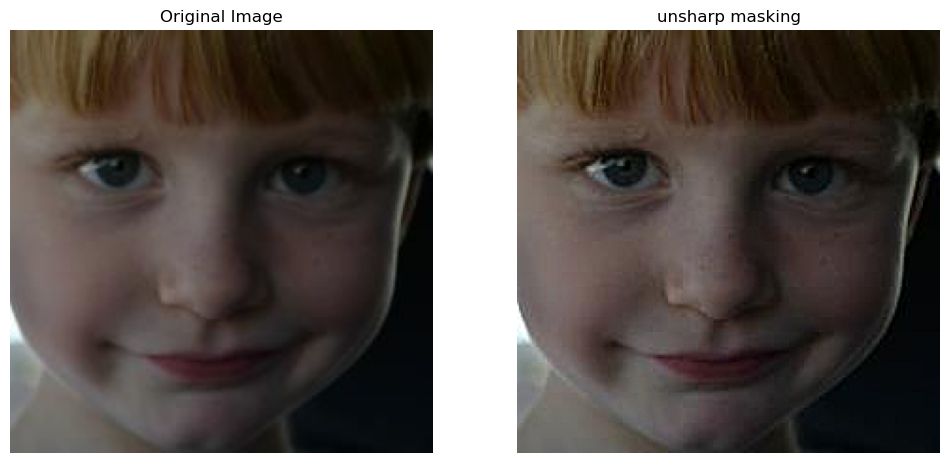

In [8]:
def unsharp_mask(image, kernel_size=(5, 5), sigma=1.0, amount=1.5, threshold=0):
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    return sharpened

# Apply unsharp masking
enhanced_image = unsharp_mask(image)
# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('unsharp masking')
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
